---
title: Statistical analysis
description: Exploratory Data Analysis of Head Coaches and Match Results datasets
---

### Imports

In [342]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import seaborn as sns

sns.set_theme(context = 'paper', style = 'ticks', palette = 'pastel', color_codes=True)
plt.rcParams['figure.autolayout'] = True

### Loading data

In [343]:
head_coach = pd.read_csv('data/head_coach.csv', parse_dates=['Appointed', 'EndDate'])
head_coach = head_coach[head_coach['Tenure'] <= 3000]
# head_coach = head_coach[head_coach['Tenure'] >= 0]

In [344]:
# Plot of wins, draw and losses percentage over days in post
head_coach['WinPercentage'] = head_coach['Wins'] / head_coach['Matches'] * 100
head_coach['DrawPercentage'] = head_coach['Draws'] / head_coach['Matches'] * 100
head_coach['LossPercentage'] = head_coach['Losses'] / head_coach['Matches'] * 100

def plot_percentage_over_days(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='Tenure', y=y_value, data=data, color = color, scatter_kws={'alpha':0.4}, label = y_leg + ' ratio')
    
    plt.title(f'{y_leg} ratio of Head Coaches appointments over Head Coaches tenure in club')
    ## x = head coach tenure in a club
    ## y = win/draw/loss ratio under the appointment of the head coach
    plt.xlabel('Head Coach tenure (days)')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

    # Calculate Pearson correlation coefficient
    r, p = pearsonr(data['Tenure'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    # plt.savefig(f'figures/{y_value}_over_hc_tenure.png')

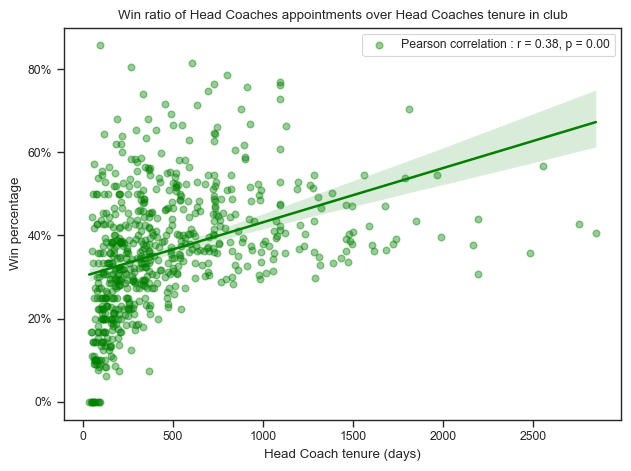

In [345]:
#| label: hc_win_ratio_over_days
plot_percentage_over_days(head_coach, 'WinPercentage', 'Win', 'green')

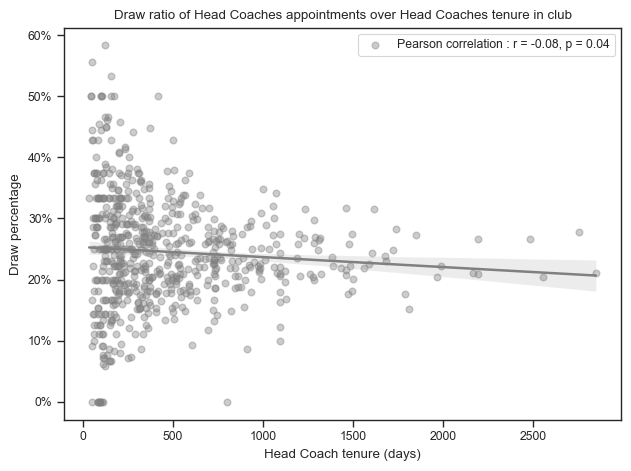

In [346]:
#| label: hc_draw_ratio_over_days
plot_percentage_over_days(head_coach, 'DrawPercentage', 'Draw', 'gray')

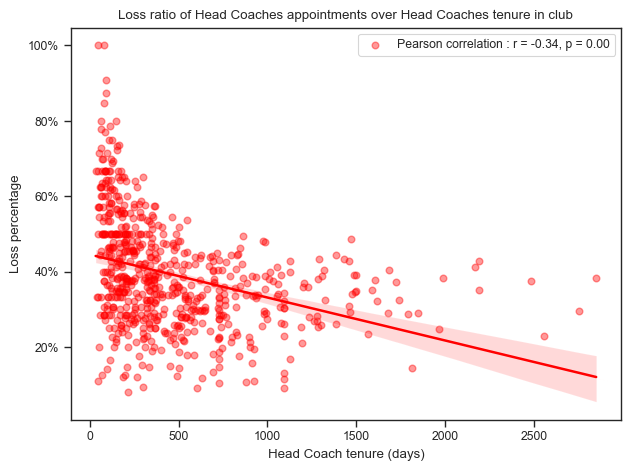

In [347]:
#| label: hc_loss_ratio_over_days
plot_percentage_over_days(head_coach, 'LossPercentage', 'Loss', 'red')

In [348]:
# Plot match outcome of clubs over number of coach seen by club

club_results = head_coach.groupby('Team').agg({'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum', 'Matches': 'sum', 'HeadCoach': 'count'})
club_results = club_results.rename(columns={'HeadCoach': 'CoachCount'})
club_results['WinPercentage'] = club_results['Wins'] / club_results['Matches'] * 100
club_results['DrawPercentage'] = club_results['Draws'] / club_results['Matches'] * 100
club_results['LossPercentage'] = club_results['Losses'] / club_results['Matches'] * 100

# Plot percentage over number of coach seen by club
def plot_club_outcome(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='CoachCount', y=y_value, data=data, color = color, scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    # x = number of coach seen by club
    # y = win/draw/loss ratio of the club
    plt.title(f'{y_leg} ratio of clubs over the number of Head Coaches teams had between xx and xx')
    plt.xlabel('Number of coach seen by club')
    plt.ylabel(f'{y_leg} percentage')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

    r, p = pearsonr(data['CoachCount'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    # plt.savefig(f'figures/{y_value}_over_club_hc_count.png')

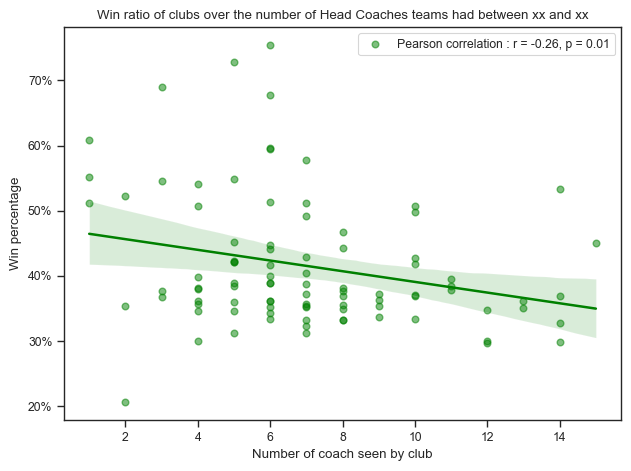

In [349]:
#| label: club_win_ratio_over_coach_count
plot_club_outcome(club_results, 'WinPercentage', 'Win', 'green')

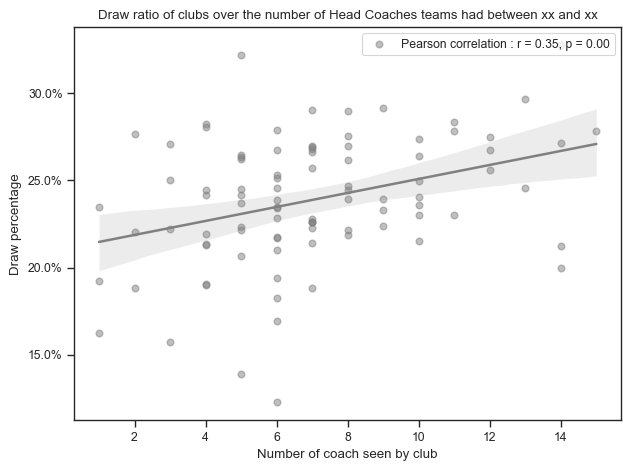

In [350]:
#| label: club_draw_ratio_over_coach_count
plot_club_outcome(club_results, 'DrawPercentage', 'Draw', 'gray')

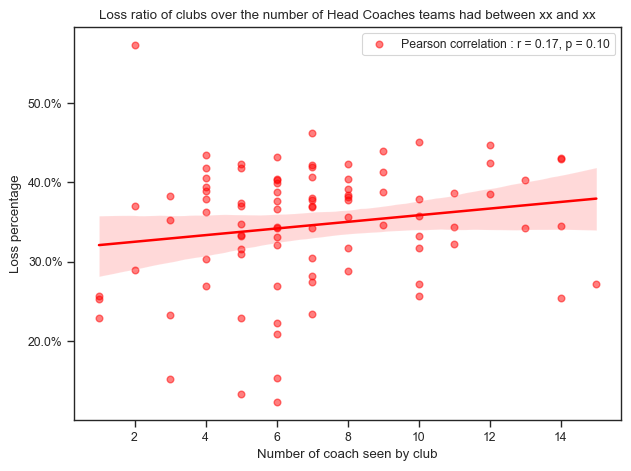

In [351]:
#| label: club_loss_ratio_over_coach_count
plot_club_outcome(club_results, 'LossPercentage', 'Loss', 'red')

In [352]:
# Plot of wins, draw and losses percentage over number of club head coach has been

head_coach_performance = head_coach.groupby('HeadCoach').agg({'Matches': 'sum', 'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum', 'Team': 'count'}).reset_index()
head_coach_performance = head_coach_performance.rename(columns={'Team': 'ClubCount'})
head_coach_performance['WinPercentage'] = head_coach_performance['Wins'] / head_coach_performance['Matches'] * 100
head_coach_performance['DrawPercentage'] = head_coach_performance['Draws'] / head_coach_performance['Matches'] * 100
head_coach_performance['LossPercentage'] = head_coach_performance['Losses'] / head_coach_performance['Matches'] * 100

# Linear regression plot for wins, draw and losses percentage over number of club head coach has been

def plot_percentage_over_club_count(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='ClubCount', y=y_value, data=data, color = color, scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    # x = number of club head coach has worked for
    # y = win/draw/loss ratio of the head coach over all clubs
    plt.title(f'Head Coach Aggregated {y_leg.capitalize()} Ratio versus Total Number of Clubs Head Coaches Worked for')
    plt.xticks(range(1, data['ClubCount'].max() + 1))
    plt.xlabel('Number of clubs Head Coach have worked for')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

    r, p = pearsonr(data['ClubCount'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')
    
    # plt.savefig(f'figures/{y_value}_over_club_per_hc_count.png')

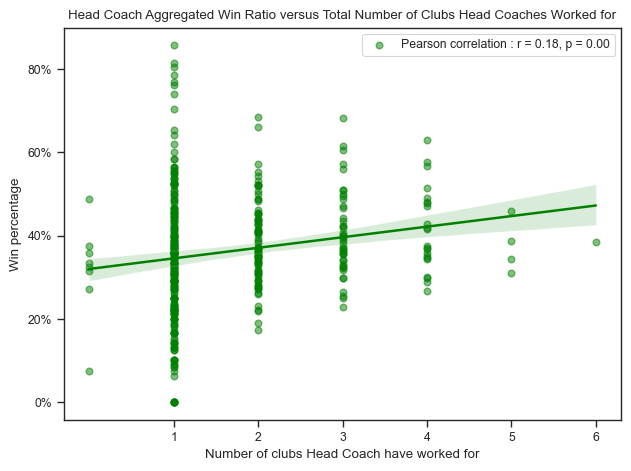

In [353]:
#| label: hc_win_ratio_over_club_count
plot_percentage_over_club_count(head_coach_performance, 'WinPercentage', 'win', 'green')


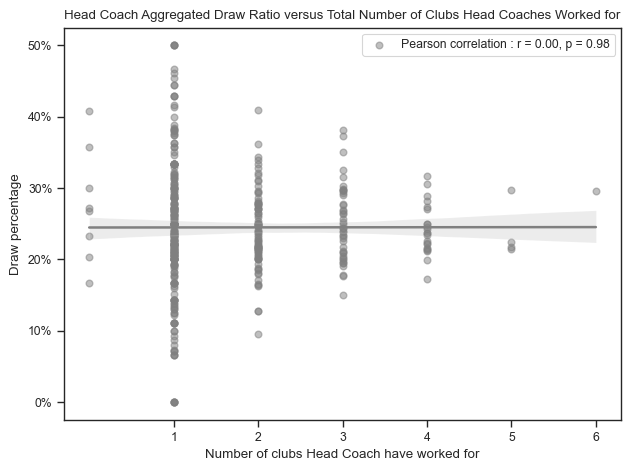

In [354]:
#| label: hc_draw_ratio_over_club_count
plot_percentage_over_club_count(head_coach_performance, 'DrawPercentage', 'draw', 'gray')

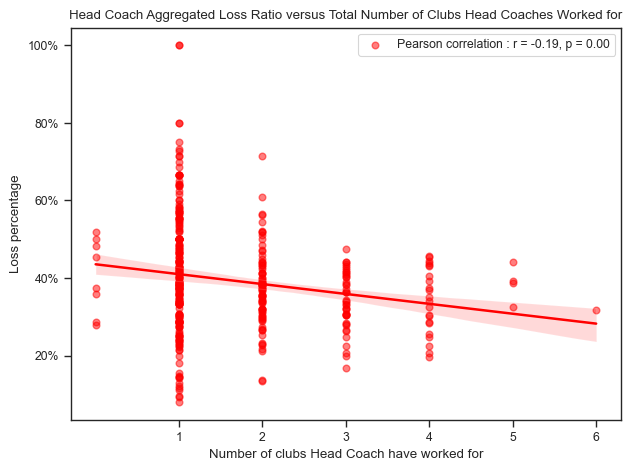

In [355]:
#| label: hc_loss_ratio_over_club_count
plot_percentage_over_club_count(head_coach_performance, 'LossPercentage', 'loss', 'red')

In [356]:
def plot_appointment_result_vs_appointment_count(data, y_value, y_leg, color):
    plt.figure()
    sns.regplot(x='AppointmentNumber', y=y_value, data=data, color = color, scatter_kws={'alpha':0.5}, label = y_leg + ' ratio')
    # x = ith appointment of the head coach
    # y = win/draw/loss ratio of the head coach during that i-th appointment
    plt.title(f'Head Coach Appointment {y_leg.capitalize()} Ratio versus Head Coach Appointment Count')
    plt.xticks(range(1, data['AppointmentNumber'].max() + 1))
    plt.xlabel('Appointment Count')
    plt.ylabel(f'{y_leg.capitalize()} percentage')
    plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

    r, p = pearsonr(data['AppointmentNumber'], data[y_value])
    plt.legend([f'Pearson correlation : r = {r:.2f}, p = {p:.2f}'], loc='upper right')

head_coach['WinPercentage'] = head_coach['Wins'] / head_coach['Matches'] * 100
head_coach['DrawPercentage'] = head_coach['Draws'] / head_coach['Matches'] * 100
head_coach['LossPercentage'] = head_coach['Losses'] / head_coach['Matches'] * 100

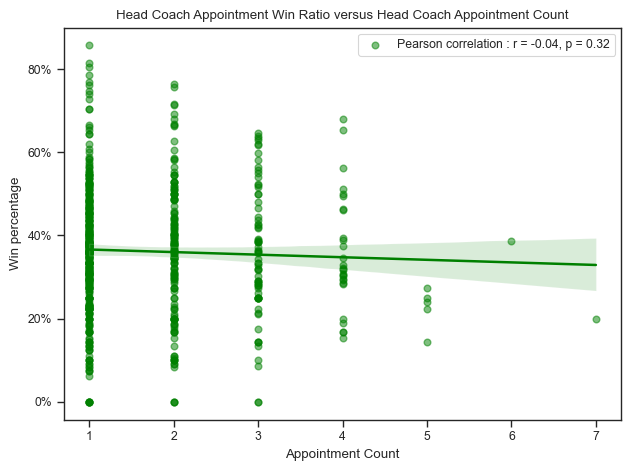

In [357]:
#| label: hc_win_vs_appointment_count
plot_appointment_result_vs_appointment_count(head_coach, 'WinPercentage', 'win', 'green')

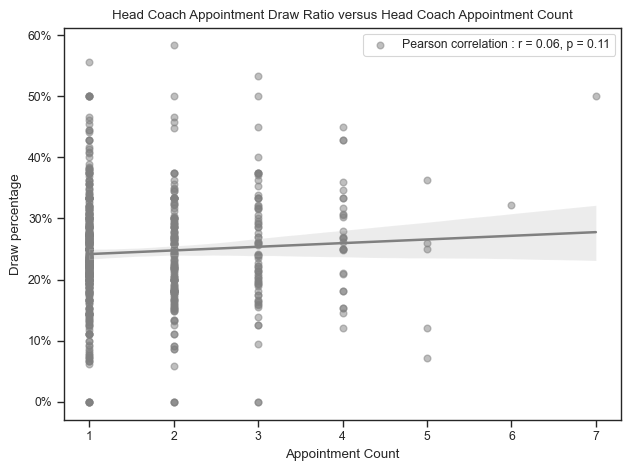

In [358]:
#| label: hc_draw_vs_appointment_count
plot_appointment_result_vs_appointment_count(head_coach, 'DrawPercentage', 'draw', 'gray')

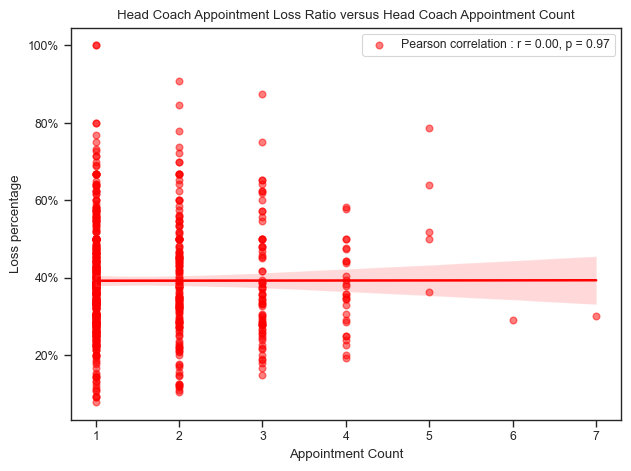

In [359]:
#| label: hc_loss_vs_appointment_count
plot_appointment_result_vs_appointment_count(head_coach, 'LossPercentage', 'loss', 'red')

### Loading data

In [360]:
#| label: joint_data
match_results = pd.read_csv('data/match_results.csv', parse_dates=['Date'], dtype = {'HeadCoach' : 'str'})
match_results.head()

,League,Country,Date,Team,Goals,Result,isHome,HeadCoach,DaysInPost
0,Premier League,England,2014-08-16,Manchester Utd,1.0,loss,True,Louis van Gaal,33.0
1,Premier League,England,2014-08-16,Stoke City,0.0,loss,True,Mark Hughes,443.0
2,Premier League,England,2014-08-16,Leicester City,2.0,draw,True,Nigel Pearson,1005.0
3,Premier League,England,2014-08-16,Arsenal,2.0,win,True,Arsène Wenger,6528.0
4,Premier League,England,2014-08-17,Liverpool,2.0,win,True,Brendan Rodgers,777.0


In [361]:
# Exclude rows where don't have information about head coach days in post during match
match_results = match_results[~match_results['DaysInPost'].isna()]
# Exclude rows with DaysInPost more than 4000
# The reason for this is that we have records of Arsenal head coach Arsene Wenger who has been in post for 22 years.
# Our data start date for matches is 2015. This makes some matches start with a head coach tenure of 5000 days.
match_results = match_results[match_results['DaysInPost'] <= 4000]

match_results['Win'] = match_results['Result'].apply(lambda x: 1 if x == 'win' else 0)
match_results['Loss'] = match_results['Result'].apply(lambda x: 1 if x == 'loss' else 0)
match_results['Draw'] = match_results['Result'].apply(lambda x: 1 if x == 'draw' else 0)


In [362]:
def plot_match_outcome_over_coach_tenure(data, y_value, y_label, color):
    # Create a jointplot
    g = sns.jointplot(data=data, x='DaysInPost', y=y_value, kind='reg', 
                      scatter_kws={'alpha':0.5, 'color': color}, 
                      line_kws={'color': color}, 
                      ratio = 3, marginal_ticks = False)
    g.figure.set_figwidth(6)
    g.figure.set_figheight(2)
    g.figure.suptitle(f'Match outcome over Head Coach Days in Post', x = 0.4, y = 1.1)
    g.set_axis_labels('Head Coach Days in Post', 'Match Outcome')
    
    # Legend
    r, p = pearsonr(data['DaysInPost'], data[y_value])
    legend = g.ax_joint.legend([f'r = {r:.2f}, p = {p:.2f}'], loc='upper left', bbox_to_anchor=(1, 1.6))
    legend.set_title("Pearson correlation")
    
    # Set y-axis tick
    g.ax_joint.set_yticks([0, 1])
    g.ax_joint.set_yticklabels(['not ' + y_label, y_label])
    # Save the figure
    # g.savefig(f'figures/{y_value}_over_coach_tenure.png')

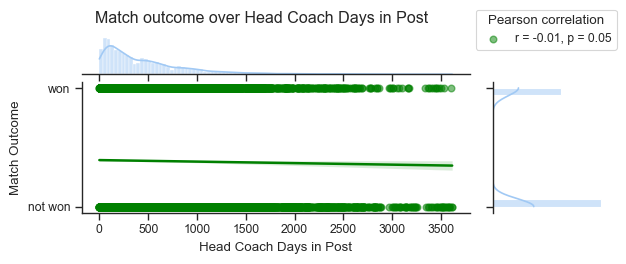

In [363]:
#| label: win_over_coach_tenure
plot_match_outcome_over_coach_tenure(match_results, 'Win', 'won', 'green')


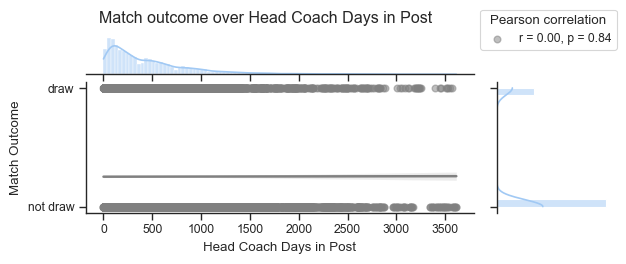

In [364]:
#| label: draw_over_coach_tenure
plot_match_outcome_over_coach_tenure(match_results, 'Draw', 'draw', 'gray')

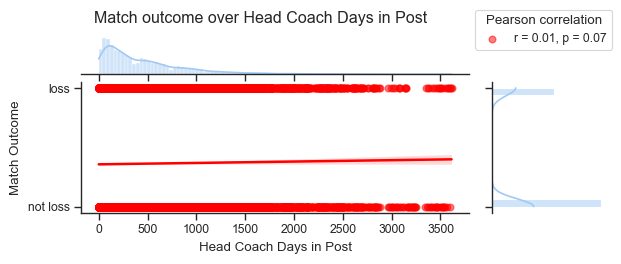

In [365]:
#| label: loss_over_coach_tenure
plot_match_outcome_over_coach_tenure(match_results, 'Loss', 'loss', 'red')

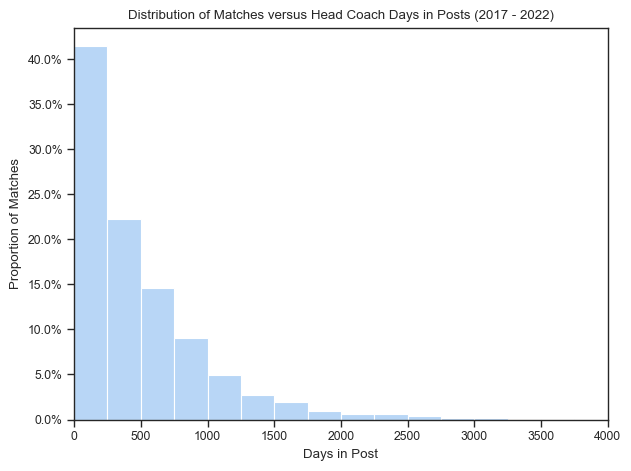

In [366]:
#| label: match_distribution_over_coach_tenure
# Create a histogram of 'match_count' over 'days_in_post'
plt.figure()
sns.histplot(data=match_results, x='DaysInPost', bins=16, stat='proportion', binrange=(0, 4000))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.xlim(0, 4000)
plt.xlabel('Days in Post')
plt.ylabel('Proportion of Matches')
plt.title('Distribution of Matches versus Head Coach Days in Posts (2017 - 2022)')
plt.show()

In [367]:
match_results_bis = match_results[match_results['DaysInPost'] < 1500]
match_results_bis = match_results_bis.groupby('DaysInPost').agg({'Win': 'mean', 'Draw': 'mean', 'Loss': 'mean', 'Result': 'count'})
match_results_bis.columns = ['WinRate', 'DrawRate', 'LossRate', 'MatchCount']
# Add missing days between the first and last day
match_results_bis = match_results_bis.reindex(range(int(min(match_results_bis.index)), int(max(match_results_bis.index) + 1)), fill_value=0)

In [368]:
def weighted_rolling_mean(data, weights, window_size=50):
    def weighted_mean(x):
        return np.average(data.loc[x.index], weights=weights.loc[x.index])

    return data.rolling(window_size, min_periods=1).apply(weighted_mean, raw=False)

window_size = 100

match_results_bis['WinRateRA'] = weighted_rolling_mean(match_results_bis['WinRate'], match_results_bis['MatchCount'], window_size)
match_results_bis['DrawRateRA'] = weighted_rolling_mean(match_results_bis['DrawRate'], match_results_bis['MatchCount'], window_size)
match_results_bis['LossRateRA'] = weighted_rolling_mean(match_results_bis['LossRate'], match_results_bis['MatchCount'], window_size)

# Ensures it sums to 1
(match_results_bis['WinRateRA'] + match_results_bis['DrawRateRA'] + match_results_bis['LossRateRA']).value_counts()

1.0    1461
1.0      39
Name: count, dtype: int64

In [373]:
stats = match_results[match_results['DaysInPost'] < 1500]
n_match = stats['Result'].count()
n_win = stats[stats['Result'] == 'win']['Result'].count()
n_draw = stats[stats['Result'] == 'draw']['Result'].count()
n_loss = stats[stats['Result'] == 'loss']['Result'].count()

Parmi l'ensemble des matchs où l'on possède des informations sur l'entraîneur sportif et où l'entraîneur sportif avait moins de 1500 jours d'ancienneté lors du match :
- le pourcentage de match gagné est de {eval}`n_win/n_match*100:.2f}%`
- le pourcentage de match nul est de {eval}`n_draw/n_match*100:.2f}%` 
- le pourcentage de match perdu est de {eval}`n_loss/n_match*100:.2f}%`.

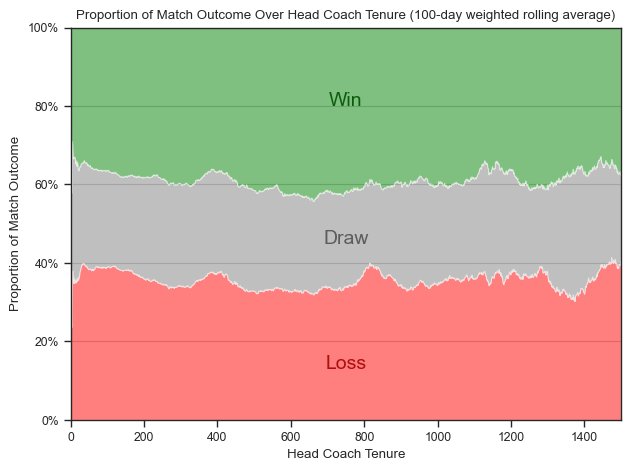

In [371]:
#| label: match_outcome_over_coach_tenure
plt.figure()
plt.stackplot(  match_results_bis.index, match_results_bis['LossRateRA'], match_results_bis['DrawRateRA'],
                match_results_bis['WinRateRA'], colors=['red', 'gray', 'green'], alpha=0.5)


plt.xlabel('Head Coach Tenure')
plt.ylabel('Proportion of Match Outcome')
plt.title(f'Proportion of Match Outcome Over Head Coach Tenure ({window_size}-day weighted rolling average)');
plt.gca().spines['left'].set_position(('data', 0))
plt.gca().spines['bottom'].set_position(('data', 0))
plt.gca().spines['top'].set_position(('data', 1))
plt.gca().spines['right'].set_position(('data', 1500))
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))
plt.xlim(0, 1500)
plt.ylim(0, 1)
# Add horizontal grid
plt.gca().yaxis.grid(True)


colors = ['green', 'gray', 'red']
light_colors = [sns.dark_palette(color, as_cmap=True)(0.6) for color in colors]
plt.text(750, 0.8, 'Win', color=light_colors[0], ha='center', fontsize=14)
plt.text(750, 0.45, 'Draw', color=light_colors[1], ha='center', fontsize=14)
plt.text(750, 0.13, 'Loss', color=light_colors[2], ha='center', fontsize=14);